## SVD 案例分析 - TMDB 5000  Movie

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

推荐系统基本有三种类型：

1. 受众特征过滤
2. 基于内容的过滤
3. 协同过滤

1. 受众特征过滤

根据电影的受欢迎程度 and/or 题材，它们为每个用户提供通用建议。

系统向具体有相似受众统计特征的用户推荐相同的电影。

由于每个用户都不同，因此被认为该方法 ***太简单***

该系统背后的基本思想是，更受大众欢迎和好评的电影具有更高的被普通观众喜欢的可能性。

2. 基于内容的过滤

也就是根据规定的某些项目，来推荐类似的项目。

该系统使用项目元数据（例如电影的流派、导演、描述、演员、等）来提出这些建议。

这些推进系统背后的总体思想是，如果某人喜欢某个特定项目，那么该用户也将喜欢与之相似的项目

3. 协同过滤

此系统匹配具有相似兴趣的人，并根据此匹配提供推荐。

协同过滤器不需要像“基于内容的推荐”那样的项目元数据

## package import

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data loading

In [96]:
credit_path = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/tmdb_5000_credits.csv' 
movie_path = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/tmdb_5000_movies.csv'
credit_df = pd.read_csv(credit_path)
movie_df = pd.read_csv(movie_path)

In [97]:
credit_df.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [98]:
movie_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [99]:
# combine both df
df1 = credit_df.copy()
df2 = movie_df.copy()
df1.rename(columns = {'movie_id':'id', 'title':'title_full'}, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4803 non-null   int64 
 1   title_full  4803 non-null   object
 2   cast        4803 non-null   object
 3   crew        4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [101]:
merge_df = pd.merge(df1, df2, on = 'id')
merge_df.head(1)

,id,title_full,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [102]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_full            4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

# data proessing - 基于受众特征过滤



### IMDB Scoring

开始之前：

- 我们需要一个指标来对电影进行评分
- 计算每部电影的评分
- 对分数进行排序，并向用户推荐评分最高的电影

我们可以将电影的平均均分作为得分，但值使用评分也不够合理。

因为假如一部电影的平均评分有8.9，但只有3人评分；

而另一部电影的平均分只有7.8，却有40人评分，

因此不能认为8.9分的电影比7.8分的更好。

因此，我们将使用IMDB的加权平稳(wr)，其公式如下：

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/IMDB评分公式.png'>

- V 评分次数
- m 能在排行榜中列出的最低评分次数
- R 平均评分
- C 整个数据的平均评分


In [103]:
merge_df.head(1)

,id,title_full,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


已知有了特征：vote_count & vote_average

C 的整体平均评分 计算如下：

In [104]:
C = merge_df['vote_average'].mean()
C

6.092171559442016

因此，所有电影在总分为10的情况下，平均评分为6.

下一步是确定m的适当值，既能在排行榜中列出的最低评分次数。

我们将使用第90个百分位数作为我们的分界点。

换句话说，要是电影在图表中出现，其评分次数必须要比列表至少 90%的电影多。

In [105]:
m = merge_df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [106]:
# 现在可以筛选符合排行榜的电影
q_movie = merge_df.copy().loc[merge_df['vote_count'] >= m]
q_movie.shape

(481, 23)

我们发现有481部电影符合此排行榜的资格。

现在，我们需要计算每个合格电影的指标。

为此，我们将定义一个函数 weight_rating（)，并定义一个新特征值 score，通过将该函数应用与合格电影的DataFrame来计算值：

In [107]:
def weighted_rating(x, m = m, C = C):
      v = x['vote_count']
      R = x['vote_average']
      return (v/(v+m) * R) + (m/(m+v) * C)

In [108]:
q_movie.head(1)

,id,title_full,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [109]:
# 定义一个新特征‘score’，使用‘weighted_rating()’函数计算‘score’的值
q_movie['score'] = q_movie.apply(weighted_rating, axis = 1)

In [110]:
q_movie_output = q_movie.sort_values('score', ascending = False)
q_movie_output[['title_full', 'vote_count', 'vote_average', 'score']].head(10)

,title_full,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


至此，我们做了第一个推荐系统（虽然很简单）。

在这些系统的“现在趋势”标签下，我们可以通过按照“受欢迎程度”列对数据进行排序，来找到非常受欢迎的电影。

### Popular Movie

在df中，有一个特征叫‘popularity’，我们根据这个特征进行排序 & 画图

In [111]:
merge_df['title'].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

Text(0.5, 0, 'Popularity')

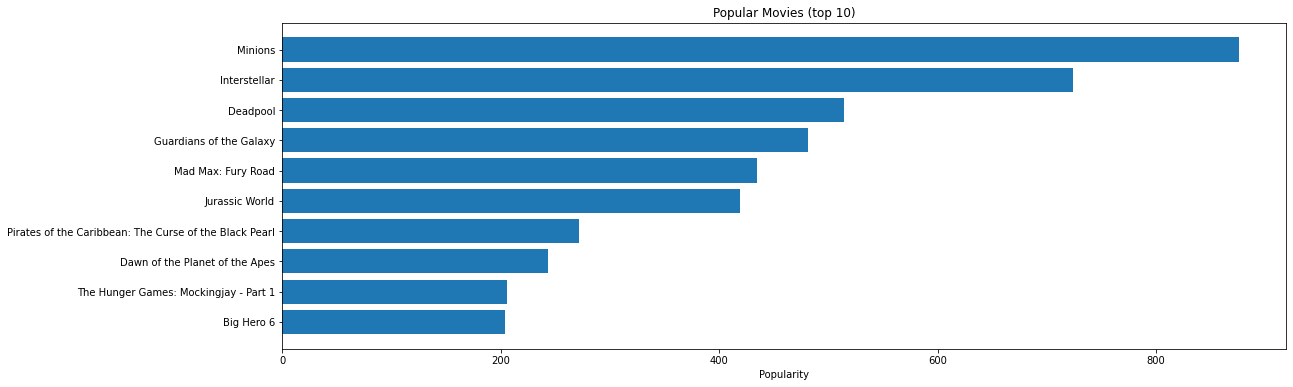

In [112]:
pop = merge_df.sort_values('popularity', ascending = False)
pop_10 = pop[:10]
plt.figure(figsize = (18, 6))
plt.barh(pop_10['title'], pop_10['popularity'])
plt.gca().invert_yaxis()
plt.title('Popular Movies (top 10)')
plt.xlabel('Popularity')

需要明白的是，虽然基于受众特征的推荐系统向所有用户提供了推荐电影的榜单。

但因为它们对特定用户的兴趣和爱好不敏感，所以我们要继续使用更完善的系统 -- 基于内容的过滤

# data proessing - 基于内容的过滤


在此推荐系统中，通过电影的内容（概述、演员、制作演员、关键词、标签等）查找其与其他电影的相似性。

然后，推荐最可能相似的电影。

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/推荐系统-简图.png' width = 500 height = 400>

### 基于情节描述的推荐系统

我们将根据所有电影的情节描述计算成堆相似度得分，并根据 ***相似度得分*** 来推荐电影。

“情节描述”在数据集的‘overview’特征已经列出

In [113]:
merge_df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

转换每个overview的词向量： 为每个概述计算词频-逆文件逆文件（TF-IDF）向量

### 什么是TF-IDF

TF-IDF (term frequency-inverse document frequency 词频-逆文件逆频率)是一种用于咨询检索与咨询探勘的常用加权技术。

TF-IDF是一种统计方法， 用以评估一个字词对于一个文件集 or 一个语料可中的其中一份文件的重要程度。

字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。

***总结： 一个词语在一篇文章中出现次数越多，同时在所有文档中出现次数越少，越能够代表该文章。这也就是TF-IDF的含义***

### 什么是TF？

TF - Term Frequency（词频）表示此条在文本中出现的频率，这个数字通常会被归一化（一般是 -> 词频/文章总词数 ），以防止它偏向长的文件（同一个词语在长文件里可能会比短文件有更高的词频，而不管该词语重要与否）。

TF用公式表示如下：

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/tf公式.png'>

其中，**n**ij 表示 词条**t**i 在文档**d**j中出现的次数，**TF**ij就是表示 词条**t**i 在 文档**d**j 中出现的频率

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/tf公式-中文.png'>

### 什么是IDF？

IDF（Inverse Document Frequency, 逆文件频率） 表示关键词的普通程度。

如果包含词条i的文档越少，IDF越大，则说明该词条具有很好的**类别区分能力**。

某要特定词语IDF，可以由总文件数目处以包含该词语秩文件的数目，再将得到的**商取对数**得到

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/IDF公式.png'>

- |D| 表示所有文档的数量
- ｜j : ti ∈ dj| 表示包含词条ti的文档数量
- 为什么要加1？ 主要是防止包含词条ti的数量=0，从而导致运算出错的现象发生

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/IDF公式-中文.png'>

某一特定文件内的高词语频率，以及该词语在整个文件集合中的低文件频率，可以产生出高权重的TF-IDF。

因此，IF-IDF倾向于过滤掉常见的词语，保留重要的词语，公式表达：

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/TF-IDF 公式.png'>

这会得到一个矩阵，其中的每一列代表overview中的一个单词（所有出现至少一个文档中的单词），每一行代表一个电影。

这样做是为了降低在情节描述中频繁出现的单词的重要性，也是它们在计算最终相似度得分中的重要性。

sklearn 中提供了一个内置的 TfIdfVectorizer类，该类以两行代码生成TF-IDF矩阵，非常好用

### 小总结

- 优点：TF-IDF算法非常容易理解，并且很容易实现，
- 缺点：其简单结构并没有考虑词语的语义信息，无法处理一词多义与一义多词的情况。

当前，真正在搜索引擎等实际应用中广泛使用的是 tf-idf 模型。

tf-idf 模型的主要思想是:**如果词w在一篇文档d中出现的频率高，并且在其他文档中很少出现，则认为词w具有很好的区分能力，适合用来把文章d和其他文章区分开来。**

（左边的鹅群里包含10只黑鹅，而右边的鹅群里只有1-2只黑鹅，则说明该“黑鹅”有很好的区分能力，适合将左右两边的鹅群区分开来）

### TfIdfVectorizer应用

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  定义一个TF-IDF矢量化的对象。删除所有英语停用此，例如'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#  用空字符串替换NaN
merge_df['overview'] = merge_df['overview'].fillna('')

merge_df['overview'][:5]

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [115]:
# 通过拟合和转换数据来构造所需的TF-IDF矩阵
tfidf_matrix = tfidf.fit_transform(merge_df['overview'])

# 输出tfidf_matrix的shape
tfidf_matrix.shape

(4803, 20978)

可以看到数据集中使用了2w多个不同的词来描述4800部电影

有了这个矩阵，我们现在可以计算一个相似度得分。有几个候选方案，例如欧几里得，皮尔逊 和 余弦相似度得分(https://zh.wikipedia.org/wiki/%E4%BD%99%E5%BC%A6%E7%9B%B8%E4%BC%BC%E6%80%A7)

没有哪个分数是最好的正确答案，不同的分数在不同情况下效果很好，尝试使用不同的指标是一个很好的分析方法。

我们将使用**余弦相似度**来计算表示两个电影之间相似度的数值。选择使用余弦相似度得分，是因为它与幅度无关，并且相对容易且快速地进行计算。

数学公式如下：

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/余弦相似度公式.png'>

由于我们使用了TF-IDF矢量化器，因此计算点积将直接为我们提供余弦相似度得分。

因此，我们将使用 sklearn 的 linear_kernel() 代替 cosine_similarities()，因为它速度更快

In [116]:
# 导入 linear_kernal
from sklearn.metrics.pairwise import linear_kernel

# 计算余弦相似度矩阵
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [117]:
cosine_sim[:2]

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ]])

In [118]:
print(cosine_sim.shape)

(4803, 4803)


我们将定义一个函数，该函数以电影标题作为输入并输出10个最相似电影的列表。

为此，我们需要电影标题和DF索引的反响映射。

换句话说，我们需要一种机制来确定电影在我们的 mata data的DF中的索引

In [119]:
# 构造索引和电影标题的反响映射
indices = pd.Series(merge_df.index, index=merge_df['title']).drop_duplicates()

In [120]:
indices[:10]

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
Spider-Man 3                                5
Tangled                                     6
Avengers: Age of Ultron                     7
Harry Potter and the Half-Blood Prince      8
Batman v Superman: Dawn of Justice          9
dtype: int64

### 最相似电影 推荐系统func

现在，就是定义推荐系统的好时候，一下是我们将遵循的步骤：

- 根据给定的标题获取电影的索引
- 获取该特定电影与所有电影的**余弦相似度得分**列表。将其转换为元组列表，其中第一个元素是其位置，第二个元素是相似度得分。
- 根据相似度得分 对上述 元组列表 进行排序（也就是第二个元素）
- 获取此列表的前10个元素。忽略第一个涉及电影本身的元素（与特定电影最相似的电影是电影本身）
- 返回与顶部元素的索引相对应的标题。

In [121]:
# 定义输入电影名称，输出与之最相似的电影的函数
def get_recommendations(title, cosine_sim = cosine_sim):
      idx = indices[title]
      
      # 获取所有电影与该电影的相似度得分
      sim_score= list(enumerate(cosine_sim[idx]))
      
      # 根据相似度得分对电影进行排序
      sim_score_sorted = sorted(sim_score, key = lambda x: x[1], reverse=True)
      
      # 获取10部最相似的电影的相似度得分
      sim_score_top_10 = sim_score_sorted[1:11]
      
      # 获取电影索引
      movie_indices = [i[0] for i in sim_score_top_10]
      
      # 返回10部最相似的电影
      return merge_df['title'].iloc[movie_indices]

In [122]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

## 让我们一步一步的分解get_redommendation()的步骤 - 针对上面的例子 The Dark Knight Rises

### 已知信息

In [123]:
# 已知信息1
indices[3:4] 

title
The Dark Knight Rises    3
dtype: int64

In [124]:
# 已知信息2
cosine_sim[3] #也就是对应的前三部电影的 余弦相似度

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

In [125]:
print(cosine_sim[3][1])

0.0


### Step 1 - 得到在indices的输入的电影的索引位置


In [126]:
title_test = 'The Dark Knight Rises'
idx_test= indices[title_test]
idx_test

3

### Step 2 - 获取所有电影与该电影的相似度得分


In [127]:
sim_score_test = list(enumerate(cosine_sim[idx_test]))

print(len(sim_score_test)) #* 该电影余弦相似度矩阵的长度 == 所有电影的数量

print(sim_score_test[:5]) #* 该电影（idx_test）对于其他电影的余弦相似度

4803
[(0, 0.0249951158376727), (1, 0.0), (2, 0.0), (3, 1.0), (4, 0.010433403719159354)]


针对前面一行代码的解释：

            - 针对'The Dark Knight Rises'这部电影 对比 其他所有电影的 余弦相似度 的值
            - 所以我们知道，每一部电影它都有 1:N的矩阵来代表 该电影：所有电影（包括自己）的余弦相似度，所以会有 4803个

### Step 3 - 根据相似度得分对电影进行排序


In [128]:
sim_score_sorted_test = sorted(sim_score_test, key = lambda x: x[1], reverse=True)
sim_score_sorted_test[:5]

[(3, 1.0),
 (65, 0.30151176591665485),
 (299, 0.29857045255396825),
 (428, 0.2878505467001694),
 (1359, 0.264460923827995)]

### Step 4 - 获取10部最相似的电影的相似度得分

由于我们已经进行了降序排序，所以排名第一的一定是 ***自己:自己 的余弦相似度***

所以选择top10时需要去除 第一个

In [129]:
sim_score_top_10_test = sim_score_sorted_test[1:11]
sim_score_top_10_test

[(65, 0.30151176591665485),
 (299, 0.29857045255396825),
 (428, 0.2878505467001694),
 (1359, 0.264460923827995),
 (3854, 0.18545003006561456),
 (119, 0.16799626199850706),
 (2507, 0.16682891043358278),
 (9, 0.1337400906655523),
 (1181, 0.13219702138476813),
 (210, 0.13045537014449818)]

### Step 5 - # 获取电影索引

In [130]:
movie_indices_test = [i[0] for i in sim_score_top_10_test]
movie_indices_test

[65, 299, 428, 1359, 3854, 119, 2507, 9, 1181, 210]

### 返回10部最相似的电影

In [131]:
merge_df['title'].iloc[movie_indices_test]

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

### 分解步骤结束

尽管我们做的系统在查找类似句剧情描述的电影方面做的不错，但是推荐的质量却不是那么好。

“The Dark Knight Rises”将重现所有蝙蝠侠电影，而喜欢该电影的人们更有可能偏向于喜欢 诺兰的其他电影，这本系统时无法捕获的。

## 基于品质，类型 和关键字的推荐系统

在本节中要做的是使用更好的元数据，提高我们推荐系统的质量。

我们将基于以下元数据构建推荐器： 3个主要演员、导演、电影类型和电影情节关键字。

从演员、导演、电影类型和电影情节关键字。

从演员，剧组 和 关键字 特征中，我们需要提取与该电影相关的三个最重要的演员、导演、关键词。

我们现在的数据是“字符串化”列表的形式，需要将其转换为安全可用的结构。

In [132]:
# 将字符串的特征解析为它们对应的python对象
from ast import literal_eval
# 对表达式节点以及包含Python字面量或容器的字符串进行安全的求值。传入的字符串或者节点里可能只包含下列的Python字面量结构: 字符串，字节对象(bytes)，数值，元组，列表，字典，集合，布尔值和 None。

In [133]:
features = ['cast', 'crew', 'keywords', 'genres']
merge_df2 = merge_df.copy()
for feature in features:
      merge_df2[feature] = merge_df2[feature].apply(literal_eval)

In [135]:
merge_df2[features].head(1)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [137]:
cast_info = merge_df2['cast'][0]

接下来，我们将定义从每个特征中提取所需信息的函数

In [140]:
# 从剧组特征中获取导演的姓名，如果没有列出director，则返回NaN
def get_director(x):
      for i in x:
            if i['job'] == 'Director':
                  return i['name']
      return np.nan

In [ ]:
# isinstance()
# 对于基本类型来说 classinfo 可以是： int，float，bool，complex，str(字符串)，list，dict(字典)，set，tuple
# 要注意的是，classinfo 的字符串是 str 而不是 string，字典也是简写 dict。

# 实例
# arg=123
# isinstance(arg, int)    #输出True
# isinstance(arg, str)    #输出False
# isinstance(arg, string) #报错

In [141]:
# 返回列表的前3个元素或整个列表
def get_list(x):
      if isinstance(x, list): # isinstance() 函数来判断一个对象是否是一个已知的类型，类似 type()。
            names = [i['name'] for i in x]
            # 检查是否存在3个以上的元素，如果是，则仅返回前三个；
            # 如果是，则返回整个列表
            if len(names) > 3:
                  names = names[:3]
            return names
      # 如果数据丢失｜｜格式错误，则返回空列表
      return []

In [150]:
# 观察一下crew的信息，是否存在director，如果存在，则保存进name的column中
merge_df2['crew'][0][6]

{'credit_id': '52fe48009251416c750ac9c3',
 'department': 'Directing',
 'gender': 2,
 'id': 2710,
 'job': 'Director',
 'name': 'James Cameron'}

In [151]:
# 以合适的形式定义新的导演、演员、类型和关键字特征
merge_df2['director'] = merge_df2['crew'].apply(get_director)
merge_df2['director'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [152]:
features2 = ['cast', 'keywords', 'genres']
for features in features2:
      merge_df2[features] = merge_df2[features].apply(get_list)
merge_df2[features2].head()

,cast,keywords,genres
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,"[Christian Bale, Michael Caine, Gary Oldman]","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


下一步是将电影名称 和 关键字实例 转换为小写 并去除它们之间的所有空格。

这样做是为了使我们的矢量化程序不会将 “Johnny Deep” 和 “Johnny Galecki” 的 “Johnny” 认作相同的

In [156]:
# 将所有字符串 转化为 小写 并 去除空格
def clean_string(x):
      if isinstance(x, list):
            return [str.lower(i.replace(" "," ")) for i in x]
      else:
            # 检查目录是否存在。如果不存在，则返回空字符串
            if isinstance(x, str):
                  return str.lower(x.replace(" ", " "))
            else:
                  return ''

In [157]:
# 对特征应用clean_string函数
features3 = ['cast','keywords','director','genres']
for feature in features3:
      merge_df2[feature] = merge_df2[feature].apply(clean_string)
      
merge_df2[features3].head()

,cast,keywords,director,genres
0,"[sam worthington, zoe saldana, sigourney weaver]","[culture clash, future, space war]",james cameron,"[action, adventure, fantasy]"
1,"[johnny depp, orlando bloom, keira knightley]","[ocean, drug abuse, exotic island]",gore verbinski,"[adventure, fantasy, action]"
2,"[daniel craig, christoph waltz, léa seydoux]","[spy, based on novel, secret agent]",sam mendes,"[action, adventure, crime]"
3,"[christian bale, michael caine, gary oldman]","[dc comics, crime fighter, terrorist]",christopher nolan,"[action, crime, drama]"
4,"[taylor kitsch, lynn collins, samantha morton]","[based on novel, mars, medallion]",andrew stanton,"[action, adventure, science fiction]"


现在，就可以创建一个函数'metadata soup'，它是一个字符串，包含我们要提供给矢量化器的所有元数据（即演员、导演和关键字）

In [158]:
def create_soup(x):
      return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director']
merge_df2['soup'] = merge_df2.apply(create_soup, axis = 1)
merge_df2['soup'].head()

0    culture clash future space war sam worthington...
1    ocean drug abuse exotic island johnny depp orl...
2    spy based on novel secret agent daniel craig c...
3    dc comics crime fighter terrorist christian ba...
4    based on novel mars medallion taylor kitsch ly...
Name: soup, dtype: object

In [160]:
#  让我们来看下 我们选取的电影的 soup 特征信息
merge_df2['soup'][3]

'dc comics crime fighter terrorist christian bale michael caine gary oldman christopher nolan'

后续步骤与我们对基于情节描述的推荐起所做的相同。

一个重要的区别是我们使用CountCountizer() 而不是TF-IDF， 这是因为我们不希望减轻演员/导演 在相对较多的电影中的表演或导演的影响

In [161]:
# 导入 CountVectorizer 并创建计数矩阵

from sklearn.feature_extraction.text import CountVectorizer
                  # CountVectorizer是属于常见的特征数值计算类，是一个文本特征提取方法。对于每一个训练文本，它只考虑每种词汇在该训练文本中出现的频率。
                  # CountVectorizer会将文本中的词语转换为词频矩阵，它通过fit_transform函数计算各个词语出现的次数。

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(merge_df2['soup'])

In [164]:
# 根据count_matrix计算余弦相似度矩阵
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [165]:
cosine_sim2[3]

array([0., 0., 0., ..., 0., 0., 0.])

In [166]:
# 重置DF的索引，像前面一样构造反响映射
merge_df2 = merge_df2.reset_index()
indices2 = pd.Series(merge_df2.index, index = merge_df2['title'])
indices2[:2]

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
dtype: int64

现在，我们可以通过传入显得cosine_sim2的矩阵作为第二个参数来重用get_recommendations()函数

In [167]:
get_recommendations('The Dark Knight Rises', cosine_sim = cosine_sim2)

119                                         Batman Begins
65                                        The Dark Knight
1196                                         The Prestige
224                                               RoboCop
358                             Atlantis: The Lost Empire
2793                                 The Killer Inside Me
280                                        Public Enemies
1827    Teenage Mutant Ninja Turtles II: The Secret of...
14                                           Man of Steel
813                                              Superman
Name: title, dtype: object

可以看到，由于更多的元数据，我们的推荐系统已成功捕获了更多信息，并为我们提供了更好的推荐。

Marvels or DC comics粉丝更有可能会喜欢同一家制作公司的电影。

因此，在上述特征中，我们可以添加进production_company.

通过在soup中多次添加特征， 还可以增加Director的权重。

# 协同过滤

我们基于内容的过滤收到一些严重的限制。

它仅能推荐接近某个电影的电影，which means 它无法捕捉用户的 口味 并提供跨类型的推荐。

同时，我们构建的推荐系统不够真正的个性化，因为它无法捕获用户的个人品味和偏见。

任何以电影为基础使用我们的推荐系统的人， 都会获得与该电影相同的推荐。

所以接下来，将使用一种称为 **“协同过滤”** 的技术来向电影观看者提出建议

## 两种类型的协同过滤

### 1. 基于用户的过滤



系统向用户的相似用户推荐用户喜欢的产品。

为了测量两个用户之间的相似性，我们可以使用 皮尔逊相关性 或 余弦相似性。

该过滤方法可以用一个例子来说明，在以下矩阵中，每一行代表一个用户，而各列对应于不同的电影，而各列对应不同的电影，但最后一个电影记录了该用户之间的相似度。

每个单元代表用户对该电影的评价。 ***（假设用户E是目标用户）***

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/基于用户的过滤-1.png'>

由于用户A和F没有与用户E有共同的电影评分，它们与用户E的相似性在 皮尔逊相关性中没有定义。

因此，我们只需要考虑用户B、C和D。

基于皮尔逊相关性，我们可以计算以下相似度

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/基于用户的过滤-2.png'>

从上表中可以看出，用户D与用户E有很大不同，因为它们之间的皮尔逊相关系数为负数。

D用户的评论均分是(1+5+4)/3 = 3.33，其为 《Me Before You》的评分高于均分；

而E用户对该电影的评分则低于其评论均分。

现在，我们可以开始填写用户E尚未根据其他用户评分电影的表格。

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/基于用户的过滤-3.png'>

看上面的表，尽管user-based CF计算非常简单，但是它仍然存在一些问题。

一个主要问题是用户的喜好会随着时间而改变，这就表明基于相邻用户的预计算矩阵可能会导致相对比较差的表现。

为了解决这个问题，我们可以应用item-based CF

### 基于内容的过滤

item-based CF 不会根据用户之间的相似度进行推荐，而是根据其与目标用户所**评价内容的相似性** 来推荐内容。

同样，可以使用皮尔逊相关性或余弦相似性来计算相似度。

主要区别在于，与user-based CF的水平填写方式相反，对于item-based CF的协作过滤，我们竖着填写表格。

下面的表 显示于如何给电影《Me Before You》完成这个内容

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/基于用户的过滤-4.png'>

由于item-based CF更静态，因此它成功避免了动态用户喜好带来的问题。

但是，这个方法仍然存在一些问题：

1. 可扩展性：计算量随着用户和内容一起增长，最坏的情况是复杂度为O(mn)，
            m：用户数量
            n：内容数量
2. 稀疏性：直接看上面表来解释 --> 尽管只有一个用户同时评价了Matrix和Titanic，但它们之间的相似度已经达到了1。在极端情况下，我们可以拥有数百万个用户，而两部完全不同的电影之间的相似度很高，可能就是因为一个用户给两者的评分相似。

# 单值分解

处理CF创建的可伸缩性和系属性问题的一种方法是利用 **“潜在因子模型”** 来捕获用户和项目之间的相似性。

本质上，我们希望将推荐问题转化为优化问题，可以将其视为**预测指定用户物品评分的准确度**。

一种常见的度量方式是均方根误差(RMSE)。

***RMSE越低， 性能越好***

**潜在因子**是一个广义的概念，它描述了用户或物品具有的属性或概念。

例如：对于音乐，潜在因子可以指音乐所属的流派。

SVD通过提取其潜在因子来减小效用矩阵的维数。

本质上，我们将每个用户和每个项目映射到维度为r 的潜在空间中。

因此，当它直接可比时，他可以帮助我们更好地了解用户与物品之间的关系。

看下图：

<img src = '/Users/gawain/Desktop/1. Machine-Learning/10. 无进度-主成分分析/dataset/单值分解-潜在因子.png'>

由于之前使用的数据集没有userid（这是协作过滤所必须的），因此需要加载另一个数据集。

我们使用Surprise来实现SVD

reference:
https://surprise.readthedocs.io/en/stable/index.html

In [169]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
reader = Reader()
rating = pd.read_csv('/Users/gawain/Desktop/1. Machine-Learning/11. 无监督-奇异值分解/lesson_3_data/movie_dataset/ratings_small.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


需要注意，在这份数据集中，电影的评分为5分制，与之前的评分制不同

In [170]:
from sklearn.model_selection import KFold
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9001  0.8921  0.9059  0.8871  0.8993  0.8969  0.0066  
MAE (testset)     0.6919  0.6905  0.6977  0.6839  0.6909  0.6910  0.0044  
Fit time          7.09    6.80    6.58    9.56    7.46    7.50    1.07    
Test time         9.08    0.28    0.14    0.49    0.14    2.02    3.53    


{'test_rmse': array([0.90008664, 0.89206645, 0.9058696 , 0.88713533, 0.89926565]),
 'test_mae': array([0.69189503, 0.69048256, 0.69766741, 0.68391587, 0.69086003]),
 'fit_time': (7.0867226123809814,
  6.797314167022705,
  6.584702968597412,
  9.561457872390747,
  7.460881948471069),
 'test_time': (9.077440977096558,
  0.2751469612121582,
  0.1436929702758789,
  0.48810696601867676,
  0.14038610458374023)}

我们得到的平均均方根误差 约为 0.89， 对于我们的情况而言已经可以了。

接下来对数据集进行训练并得出预测

In [171]:
trainset = data.build_full_trainset()
svd.fit(trainset)

先选择ID=1的用户，并检查用户给出的评分

In [172]:
rating[rating['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [173]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.638742072640594, details={'was_impossible': False})

对于影片ID为302的电影，我们获得的预测值为2.586. 此推荐系统的一个令人震惊的功能是它不在乎电影是什么（电影内容包含哪些）。

它纯粹基于分配的影片ID进行工作，并尝试根据其他用户对该片的预测来预测评分。

# 总结

我们使用手中特征过滤，基于内容的过滤和协同过滤来推荐系统。

虽然受众特征过滤非常简单，但却无法实际使用。

混合系统可以利用基于内容的过滤和协同过滤，因此事实证明这两种方法几乎是互补的。

该模型是非常基础的参照模型，仅提供了一个入门的框架